# Lab assignment: indoor image classification

<img src="img/indoor_outdoor.png" style="width:800px;">

In this assignment we will face an image classification problem, trying to tell apart images taken indoors from images taken on the outside. To do so we will use a Deep Learning approach.

## Guidelines

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>You will need to solve a question by writing your own code or answer in the cell immediately below or in a different file, as instructed.</td></tr>
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>This is a hint or useful observation that can help you solve this assignment. You should pay attention to these hints to better understand the assignment.</td></tr>
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td>This is an advanced and voluntary exercise that can help you gain a deeper knowledge into the topic. Good luck!</td></tr>
</table>

During the assigment you will make use of several Python packages that might not be installed in your machine. If that is the case, you can install new Python packages with

    conda install PACKAGENAME
    
if you are using Python Anaconda. Else you should use

    pip install PACKAGENAME

You will need the following packages for this particular assignment. Make sure they are available before proceeding:

* **numpy**
* **matplotlib**
* **keras**

The following code will embed any plots into the notebook instead of generating a new window:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Lastly, if you need any help on the usage of a Python function you can place the writing cursor over its name and press Caps+Shift to produce a pop-out with related documentation. This will only work inside code cells. 

Let's go!

## Preliminaries: data loading and image representation

In this assignment we will work with the images contained in the following folders, where training and test data is available:

In [22]:
trainingdatafolder = "./trainingdata/"
testdatafolder = "./testdata/"

For each one of these folders two subfolders exist: one containing a range of indoor images and another one with outdoor images. We can load an image into python by making use of:

In [23]:
from scipy.misc import imread

path = trainingdatafolder + "indoor/1.jpg"
image = imread(path)
image

C:\Anaconda3\envs\tf12\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


array([[[118, 104,  93],
        [117, 103,  92],
        [117, 103,  92],
        ...,
        [100, 100, 108],
        [ 99, 102, 111],
        [100, 103, 112]],

       [[118, 104,  93],
        [118, 104,  93],
        [119, 105,  94],
        ...,
        [ 99, 102, 109],
        [ 99, 102, 111],
        [ 99, 102, 111]],

       [[118, 104,  93],
        [118, 104,  93],
        [120, 106,  95],
        ...,
        [102, 105, 112],
        [101, 104, 113],
        [ 99, 101, 113]],

       ...,

       [[143, 148, 141],
        [140, 142, 137],
        [143, 143, 141],
        ...,
        [106, 154, 192],
        [ 97, 148, 195],
        [100, 151, 206]],

       [[155, 155, 147],
        [151, 152, 146],
        [150, 152, 149],
        ...,
        [109, 157, 195],
        [ 98, 150, 197],
        [101, 152, 205]],

       [[157, 152, 148],
        [156, 152, 149],
        [152, 154, 153],
        ...,
        [103, 153, 190],
        [ 98, 151, 195],
        [102, 153, 206]]

This returns the image as 3-dimensional numpy matrix, containing the value of intensity of every pixel in each row, column and color channel.

In [24]:
image.shape

(781, 1037, 3)

In [25]:
image.dtype

dtype('uint8')

We can visualize the loaded image using

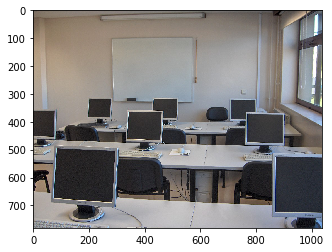

In [26]:
plt.imshow(image)

Note that the 3rd dimension of our image objects is the pixel intensity. This is divided into 3 **color channels**: those belonging to the red (R), green (G) and blue (B) intensities (**RGB** scheme). Each of these intensities ranges from 0 to 255, since these are 24-bit images: each of the 3 colors is represented by 8 bits, so they can range from 0 (all 8 bits set to 0) to 255 (all 8 bits set to 1). Let us define constants for this:

In [27]:
COLORS = ('r','g','b')
COLOR_MIN_VALUE = 0
COLOR_MAX_VALUE = 255
COLOR_NUM_VALUES = COLOR_MAX_VALUE - COLOR_MIN_VALUE + 1

When R, G and B are all zero, the pixel is totally black. When they are all 255, the pixel is totally white. Pure red is (255, 0, 0), pure green (0, 255, 0) and pure blue (0, 0, 255). Intermediate colors have intermediate values, according to what the specific pixel is. For example, let us manipulate the colors of the previous image:

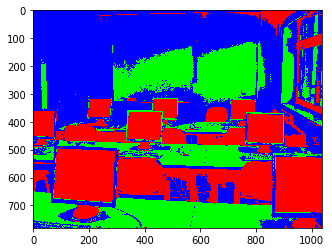

In [28]:
# Tolerance for white and black
tol = 100
white_end = tol - COLOR_MIN_VALUE
black_start = COLOR_MAX_VALUE - tol
# Copy image
image2 = image.copy()
# Set black pixels to pure red
black_pixels = (image[:, :, 0] <= white_end) & (image[:, :, 1] <= white_end) & (image[:, :, 2] <= white_end)
image2[black_pixels] = [COLOR_MAX_VALUE, COLOR_MIN_VALUE, COLOR_MIN_VALUE]
# Set white pixels to pure green
white_pixels = (image[:, :, 0] >= black_start) & (image[:, :, 1] >= black_start) & (image[:, :, 2] >= black_start)
image2[white_pixels] = [COLOR_MIN_VALUE, COLOR_MAX_VALUE, COLOR_MIN_VALUE]
# Set all the rest to pure blue
image2[~(black_pixels | white_pixels)] = [COLOR_MIN_VALUE, COLOR_MIN_VALUE, COLOR_MAX_VALUE]
# Plot result
plt.imshow(image2)

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Build a matrix *X_train* containing one row for each training image in the data. Each row must contain the 3-dimensional matrix of pixels corresponding to an image. Build also a corresponding matrix *Y_train* with the class of each training image (0 for indoor and 1 for outdoor). Then repeat the same procedure to generator *X_test* and *Y_test* matrices for the test data.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Take advantage of the *glob* package to generate the filename lists for the indoor and outdoor subfolders.
 </td></tr>
</table>

In [30]:
import glob
import matplotlib.image as mpimg
import numpy as np
from scipy.misc import imresize

n=40
#cargamos las imagenes para X_train redimensionándolas
X_train = [imresize(mpimg.imread(img),(n,n)) for img in glob.glob("./trainingdata/indoor/*.jpg") + glob.glob("./trainingdata/outdoor/*.jpg")]

Y_train = []   
for img in glob.glob("./trainingdata/indoor/*.jpg"):
    Y_train.append('0')
for img in glob.glob("./trainingdata/outdoor/*.jpg"):
    Y_train.append('1')
    

print(np.array(X_train).shape)
print(np.array(X_train).dtype)
print(np.array(Y_train).shape)

C:\Anaconda3\envs\tf12\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


(188, 40, 40, 3)
uint8
(188,)


In [31]:
n=40
#cargamos las imagenes para X_test redimensionándolas
X_test = [imresize(mpimg.imread(img),(n,n)) for img in glob.glob("./testdata/indoor/*.jpg") + glob.glob("./testdata/outdoor/*.jpg")]

Y_test = []   
for img in glob.glob("./testdata/indoor/*.jpg"):
    Y_test.append('0')
for img in glob.glob("./testdata/outdoor/*.jpg"):
    Y_test.append('1')
    


C:\Anaconda3\envs\tf12\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


If everything has been properly loaded both X_train and Y_train lists should have equal length, and the same should happen for the pair X_test and Y_test.

In [32]:
print("X_train size", len(X_train)) #Tenemos 188 imagenes para training y test
print("Y_train size", len(Y_train))
print("X_test size", len(X_test))
print("Y_test size", len(Y_test))

X_train size 188
Y_train size 188
X_test size 188
Y_test size 188


## Data preprocessing

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
For efficiency in batch processing, in keras all input patterns should have equal dimensions. Even more, when working with images keras expects as training input a 4-dimensional matrix with dimensions (patterns, image_width, image_height, color_channels). Therefore, you must preprocess the data into this format. It is also highly recommended to rescale the pixel values to make them lie in the range [0,1]. Finally, you might also need to perform some transformation on the outputs Y.
 </td></tr>
</table>

In [33]:
#Reescalamos y comprobamos el tamaño de las muestras

X_train = np.array(X_train) / 255
X_test =np.array(X_test) / 255
print (X_train.shape)
print (X_test.shape)


(188, 40, 40, 3)
(188, 40, 40, 3)


In [34]:
from keras.utils import np_utils
Y_train =  np_utils.to_categorical(Y_train,2)
Y_test =  np_utils.to_categorical(Y_test,2)

Y_train.shape

(188, 2)

## Deep model

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Create a deep network that solves the classification problem. Make use of the layers you seem fit for problem. You cannot use the test data for fitting the network, but you can use it to check the performance of different network architectures over such test data, and select the architecture performing best.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
A minimum of 70% accuracy in test is to be expected when solving this problem. If you are unable to attain this result, check that the data is organized correctly, and that the values of the pixels have been normalized. Resizing the images to smaller sizes might be helpful as well. Also, if you observe that your network does not improve the loss after each training epoch, that might be another symptom of one of the problems above, or of a wrong network design.
 </td></tr>
</table>

In [15]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Dropout
from keras.layers.core import Flatten

####### INSERT YOUR CODE HERE
img_rows = 40
img_cols = 40
kernel_size = 3 # Size of the kernel for the convolution layers
pool_size = 2 # Size of the pooling region for the pooling layers
seed = 1990
np.random.seed(seed)
model = Sequential()

model.add(Convolution2D(32,(kernel_size, kernel_size),
                        padding='valid',
                        input_shape=(img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
history = model.fit(
    X_train, # Training data
    Y_train, # Labels of training data
    batch_size=150, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=1 # Level of verbosity of the log messages
)

score = model.evaluate(X_test, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

Epoch 1/20
188/188 [==============================] - 1s 4ms/step - loss: 0.6891 - acc: 0.5904
Epoch 2/20
188/188 [==============================] - 0s 2ms/step - loss: 0.6808 - acc: 0.5266
Epoch 3/20
188/188 [==============================] - 0s 2ms/step - loss: 0.6466 - acc: 0.6170
Epoch 4/20
188/188 [==============================] - 0s 2ms/step - loss: 0.5988 - acc: 0.6330
Epoch 5/20
188/188 [==============================] - 0s 2ms/step - loss: 0.6023 - acc: 0.6011
Epoch 6/20
188/188 [==============================] - 0s 2ms/step - loss: 0.5444 - acc: 0.7660
Epoch 7/20
188/188 [==============================] - 0s 2ms/step - loss: 0.5508 - acc: 0.7181
Epoch 8/20
188/188 [==============================] - 0s 2ms/step - loss: 0.5141 - acc: 0.7660
Epoch 9/20
188/188 [==============================] - 0s 2ms/step - loss: 0.4864 - acc: 0.7926
Epoch 10/20
188/188 [==============================] - 0s 2ms/step - loss: 0.4908 - acc: 0.7340
Epoch 11/20
188/188 [============================

Obtenemos un accuracy en validación de 0.78. A continuación tenemos la evolución del accuracy en train.

dict_keys(['loss', 'acc'])


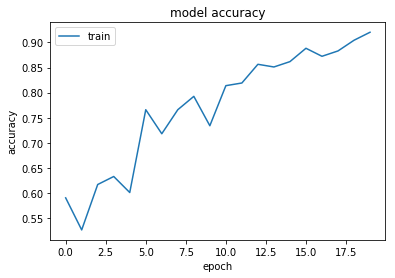

In [16]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
You can further improve your results by applying one or more of the following strategies:
<ul>
<li>Make use of **metamodelling techniques** to selected the best architecture parameters for the networks. You can use scikit-learn methods GridSearchCV or RandomSearchCV. Even better, you can make use of more advanced methods such as those included in the <a href="https://scikit-optimize.github.io/">scikit-optimize</a> library.</li>
<li>Use **image augmentation techniques** to produce additional noisy training images. To do so, you can make use of <a href="https://keras.io/preprocessing/image/">ImageDataGenerator</a> in Keras.</li>
<li>Use an <a href="https://keras.io/callbacks/#earlystopping">**EarlyStopping strategy**</a> to monitor the loss over the test data, and stop when training when after a number of iterations such loss has not improved.
</ul>
If you correctly use these techniques you should be able to obtain a better model, with test accuracy over 80%.
  
 </td></tr>
</table>

In [18]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from skopt import gp_minimize
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping


Vamos a intentar mejorar nuestro modelo. Para ello nos valemos de técnicas como ImageDataGenerator y EarlyStopping.

In [41]:
model = Sequential()
np.random.seed(7)

model.add(Convolution2D(32,(kernel_size, kernel_size),
                        padding='valid',
                        input_shape=(img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

#EarlyStopping
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5, \
                          verbose=1, mode='auto')
callbacks_list = [earlystop]


train_datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rescale=1./255,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'trainingdata',
        target_size=(40, 40),
        batch_size=40,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        'testdata',
        target_size=(40, 40),
        batch_size=40,
        class_mode='categorical',
        shuffle=False)

model.fit_generator(
        train_generator,
        steps_per_epoch=50,
        epochs=15,
        validation_data=validation_generator,
        callbacks=callbacks_list,
        validation_steps=5,
        verbose=1)

Found 188 images belonging to 2 classes.
Found 188 images belonging to 2 classes.
Epoch 1/15
50/50 [==============================] - 10s 209ms/step - loss: 0.6487 - acc: 0.6242 - val_loss: 0.5303 - val_acc: 0.7660
Epoch 2/15
50/50 [==============================] - 10s 205ms/step - loss: 0.4907 - acc: 0.7605 - val_loss: 0.5373 - val_acc: 0.7500
Epoch 3/15
50/50 [==============================] - 13s 257ms/step - loss: 0.4431 - acc: 0.8081 - val_loss: 0.5224 - val_acc: 0.7660
Epoch 4/15
50/50 [==============================] - 13s 257ms/step - loss: 0.4061 - acc: 0.8230 - val_loss: 0.5043 - val_acc: 0.7979
Epoch 5/15
50/50 [==============================] - 12s 243ms/step - loss: 0.4068 - acc: 0.8209 - val_loss: 0.5137 - val_acc: 0.7926
Epoch 6/15
50/50 [==============================] - 12s 234ms/step - loss: 0.3851 - acc: 0.8322 - val_loss: 0.5047 - val_acc: 0.7926
Epoch 7/15
50/50 [==============================] - 11s 222ms/step - loss: 0.3699 - acc: 0.8377 - val_loss: 0.5063 - val

Tras estas técnicas conseguimos una accuracy en validación de 0.8032, una ligera mejoría.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Compute the accuracy of your network over the test set.
 </td></tr>
</table>

Aunque lo hemos calculado previamente cuando lanzamos el modelo ya que incluímos *validation_data*, a continuación obtenemos individualmente el score: 

In [42]:
score = model.evaluate_generator( validation_generator)
print("Test loss", score[0])
print("Test accuracy", score[1])

Test loss 0.5258818604844682
Test accuracy 0.8031914957026218


Finalmente utilizando ImageDataGenerator y EarlyStopping logramos un accuracy en test de 0.813. Tal vez podríamos mejorarlo con un GridSearch o método de optimización.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Find and show an image for which the model fails. Can you give an explanation for this behavior?
 </td></tr>
</table>

Como tenemos tanto las clases a las que pertenecen las imagenes de test como las predicciones obtenidas, vamos a comprobar para qué imagenes nuestro modelo no clasifica bien.

In [46]:
validation_generator.classes
validation_generator.filenames
predictions = model.predict_generator(validation_generator)        
predictions2 = np.argmax(predictions, axis=-1)
print("Matriz de clases:\n",validation_generator.classes)
print ("Matriz de predicciones:\n",predictions2)


Matriz de clases:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
Matriz de predicciones:
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1]


Para los siguientes índices las correspondientes imágenes están mal clasificadas:

In [77]:
indices_erroneos = np.where(validation_generator.classes != predictions2)[0]
indices_erroneos

array([  3,  15,  22,  25,  34,  37,  44,  46,  48,  52,  54,  58,  60,
        70,  73,  75,  77,  80,  85,  98, 107, 110, 120, 122, 124, 126,
       128, 135, 136, 141, 142, 145, 150, 151, 179, 181, 185], dtype=int64)

In [88]:
validation_generator.filenames[179]

'outdoor\\192.jpg'

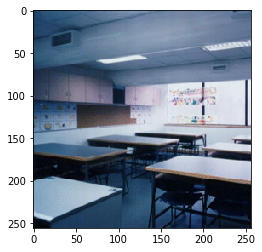

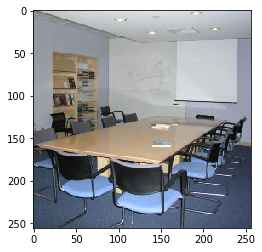

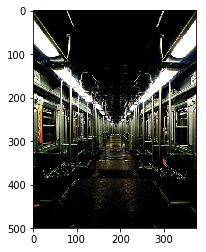

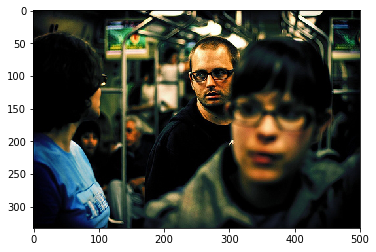

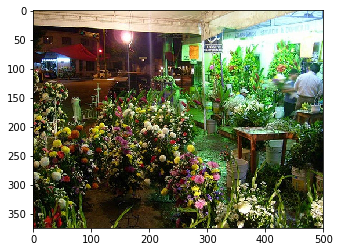

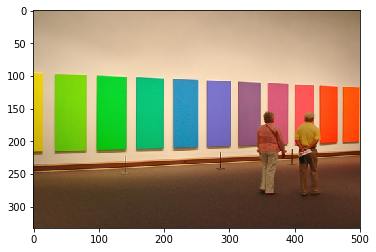

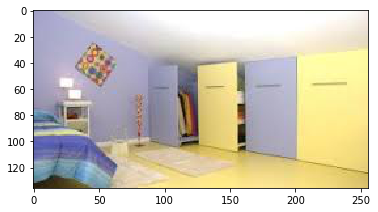

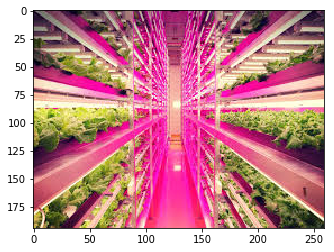

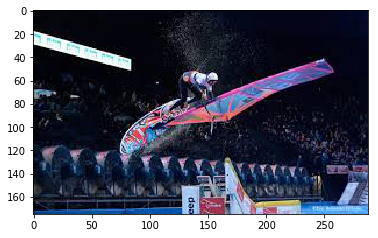

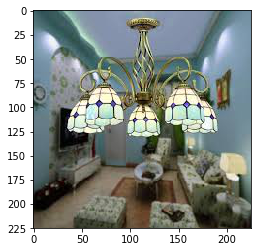

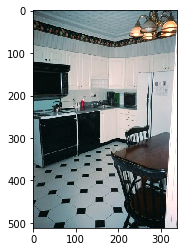

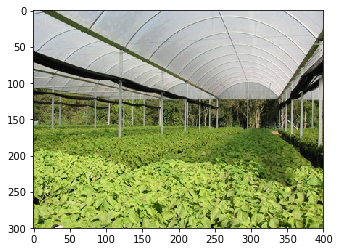

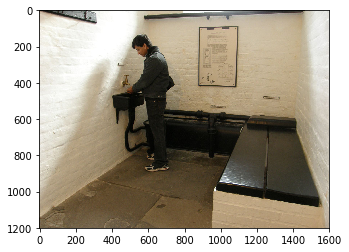

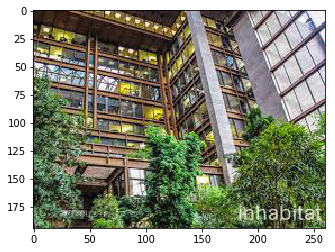

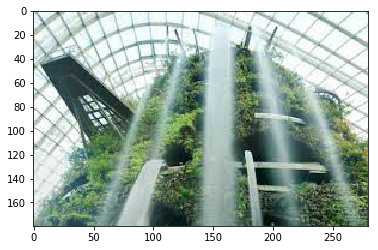

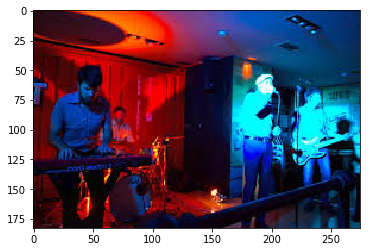

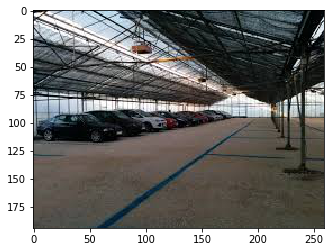

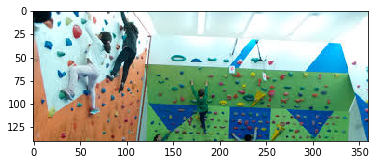

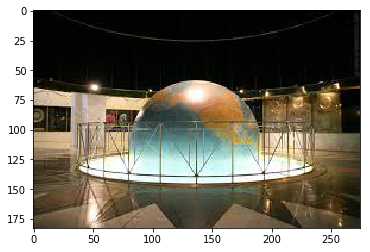

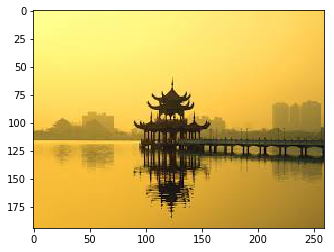

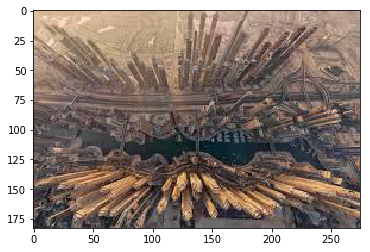

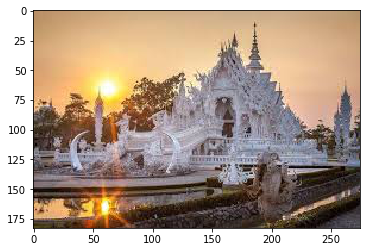

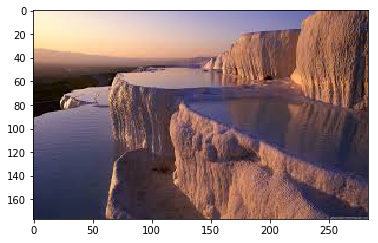

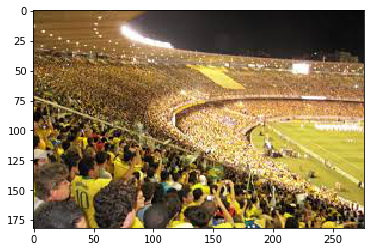

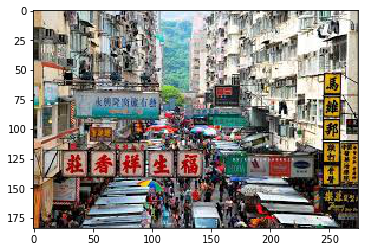

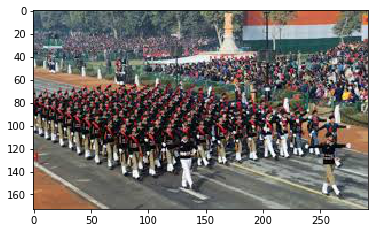

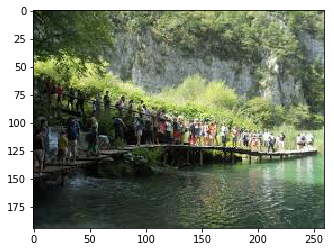

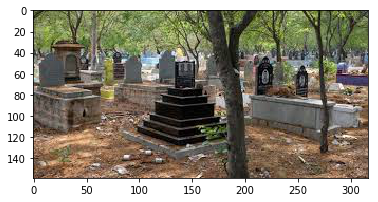

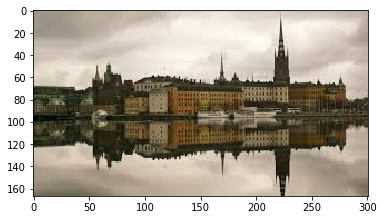

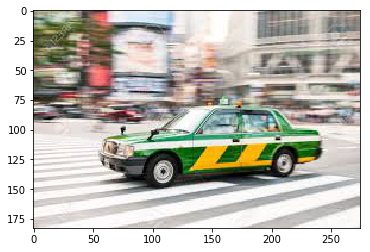

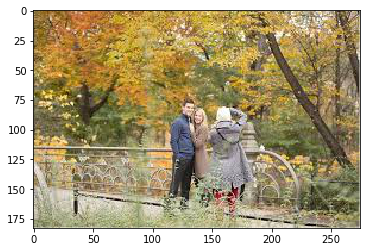

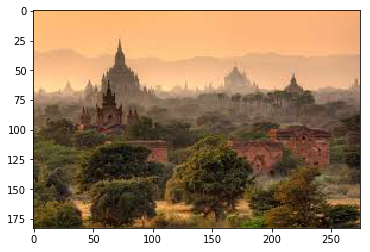

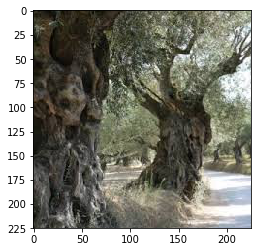

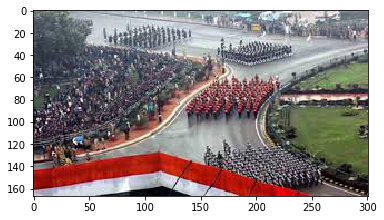

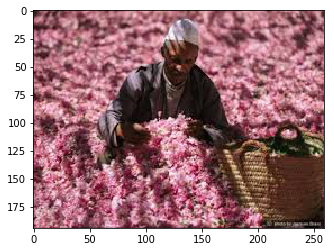

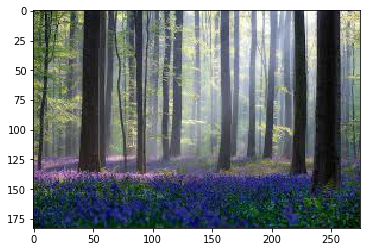

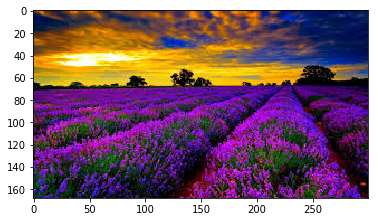

In [93]:
#cargamos las imágenes de test de nuevo esta vez sin redimensionarlas para que no pierdan calidad
X_test = [(mpimg.imread(img)) for img in glob.glob("./testdata/indoor/*.jpg") + glob.glob("./testdata/outdoor/*.jpg")]
for i in indices_erroneos:
    plt.figure()
    plt.imshow(X_test[i])
    plt.show()

Observamos que la mayoría de las imágenes indoor mal clasificadas son aquellas que presentan iluminación, bombillas, luces en la parte superior de la imagen, pudiendo confundirse así con una imagen de exterior.